In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Dataset Link:
https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset

In [ ]:
# @title
from IPython.display import display, HTML

html = """
<div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align: center;">
    <h2 style="color: #2c3e50;"> Team Names </h2>
    <table style="margin: auto; border-collapse: collapse; font-size: 18px; box-shadow: 0 0 10px rgba(0,0,0,0.1);">
        <thead style="background-color: #34495e; color: white;">
            <tr>
                <th style="padding: 12px 24px; border: 1px solid #ccc;">Name</th>
                <th style="padding: 12px 24px; border: 1px solid #ccc;">ID</th>
            </tr>
        </thead>
        <tbody>
            <tr style="background-color: #ecf0f1;">
                <td style="padding: 10px 20px; border: 1px solid #ccc;">طارق شكري ابوزيد</td>
                <td style="padding: 10px 20px; border: 1px solid #ccc;"><strong>1404-3-147</strong></td>
            </tr>
            <tr>
                <td style="padding: 10px 20px; border: 1px solid #ccc;">محمد عبدالمحسن محمد</td>
                <td style="padding: 10px 20px; border: 1px solid #ccc;"><strong>1404-3-149</strong></td>
            </tr>
            <tr style="background-color: #ecf0f1;">
                <td style="padding: 10px 20px; border: 1px solid #ccc;">محمد حمادة علي</td>
                <td style="padding: 10px 20px; border: 1px solid #ccc;"><strong>1404-3-237</strong></td>
            </tr>
            <tr>
                <td style="padding: 10px 20px; border: 1px solid #ccc;">محمد السيد ابراهيم</td>
                <td style="padding: 10px 20px; border: 1px solid #ccc;"><strong>1404-3-235</strong></td>
            </tr>
            <tr style="background-color: #ecf0f1;">
                <td style="padding: 10px 20px; border: 1px solid #ccc;">مؤمن ابراهيم مصطفي</td>
                <td style="padding: 10px 20px; border: 1px solid #ccc;"><strong>1404-3-054</strong></td>
            </tr>
        </tbody>
    </table>
</div>
"""

display(HTML(html))


# Assessing

In [87]:
df = pd.read_csv('amazon.csv')

print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [88]:
print("\nDataset Shape:")
df.shape


Dataset Shape:


(1465, 16)

In [89]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-nul

discounted_price, actual_price, rating, and rating_count were all of type object, we can change them to a numeric data type

In [90]:
print("\nMissing values in each column:")
df.isnull().sum()



Missing values in each column:


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

the null values is not an issue in this case

In [91]:
# Check for duplicate rows
print("\nNumber of duplicate rows:")
df.duplicated().sum()



Number of duplicate rows:


np.int64(0)

The whole row could be not duplicated but what about a subset of ['user_id', 'product_id', 'review_id']

In [92]:
duplicates = df.duplicated(subset=['user_id', 'product_id', 'review_id'], keep=False)

#count the num of duplicated rows
num_duplicates = duplicates.sum()
print(f" Found {num_duplicates} duplicate rows based only on ['user_id', 'product_id', 'review_id'].")


#print a sample of duplicates
if num_duplicates > 0:
    print("\n Sample duplicated rows based on those 3 columns:")
    display(df.loc[duplicates, ['user_id', 'product_id', 'review_id']].head())


 Found 188 duplicate rows based only on ['user_id', 'product_id', 'review_id'].

 Sample duplicated rows based on those 3 columns:


,user_id,product_id,review_id
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K..."
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY..."
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2..."
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",B08HDJ86NZ,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1..."
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",B08CF3B7N1,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R..."


In [93]:
#invistigate one of the duplicates
df[df.product_id =='B07JW9H4J1']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
369,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,270",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/I/51UsScvHQN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
614,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [94]:
#invistigate another one
df[df.product_id =='B096MSW6CT']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
379,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/I/31IvNJZnmd...,https://www.amazon.in/Sounce-iPhone-Charging-C...
623,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


it seems that the difference occurs one columns like the price and rating count and the diff is not huge, and since the number of duplicated rows is only 188 rows, I don't think that it will be an issue to g

In [95]:
#check the rating values to confirm if we can change the data type
df.rating.unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [96]:
#check the rating values to confirm if we can change the data type
df.rating_count.unique()

array(['24,269', '43,994', '7,928', ..., '468', '8,031', '6,987'],
      dtype=object)

since all the data is float, so, we can change the data type to be float and we need to remove the '|'

In [97]:
#print the rows with this value
df[df.rating == '|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


one record could be removed and will not cause an issue

In [98]:
#check the columns that are suspected to have multiple values in the same cell
cols_to_check = ['user_id', 'user_name', 'review_id', 'review_title', 'review_content']

for col in cols_to_check:
    df[col] = df[col].astype(str)
    multi_value_rows = df[col].str.contains(',')
    count = multi_value_rows.sum()
    print(f" {col}: {count} rows have multiple values (comma-separated)")


 user_id: 1461 rows have multiple values (comma-separated)
 user_name: 1461 rows have multiple values (comma-separated)
 review_id: 1461 rows have multiple values (comma-separated)
 review_title: 1461 rows have multiple values (comma-separated)
 review_content: 1463 rows have multiple values (comma-separated)


In [99]:
df.describe()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


**Data Assessment Observations:**

 - The category column contains multiple nested subcategories in a single cell, separated by the | character. This should be split into individual levels.

 - Several user-related columns (user_id, user_name, review_id) contain multiple values separated by commas, indicating that a single row may represent multiple user reviews. This violates the expected user-item-rating structure for recommender systems and should be separated into individual rows.

 - Columns like discounted_price, actual_price, rating, and rating_count are stored as object types. These should be converted to numeric types. However, price columns contain currency symbols (₹) and commas, which must be removed before conversion.

 - Some ratings appear to be invalid or out of range (ex:'|'), and should be filtered out or cleaned.

 - The rating_count column contains comma-separated numbers, which need to be cleaned and converted to integers.

 - Duplicates exist based on the combination of ['user_id', 'product_id', 'review_id'], and should be removed

 - Some columns may be unnecessary and can be dropped.

 - A new column rating_weighted can be created, combining rating and rating_count to give more weight to products with a high number of ratings. This helps identify consistently well-rated products more reliably.



# Cleaning


In [100]:
# make a copy from the data to not affect the original one
df_copy= df.copy()
df_copy.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


In [101]:

# Clean price columns
df_copy['discounted_price'] = df_copy['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
df_copy['actual_price'] = df_copy['actual_price'].replace('[₹,]', '', regex=True).astype(float)

df_copy.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


In [102]:
# delete the record which contains rating = '|'
df_copy = df_copy[df_copy['product_id'] != 'B08L12N5H1']

#validation
df_copy[df_copy.rating == '|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [103]:
# Clean rating and rating_count columns
df_copy['rating'] = pd.to_numeric(df_copy['rating'])
df_copy['rating_count'] = (
    pd.to_numeric(                      
        df_copy['rating_count'].str.replace(',', ''),
        errors='coerce'                 
    )
    .astype('Int64')                    
)
#validation 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1464 non-null   object 
 1   product_name         1464 non-null   object 
 2   category             1464 non-null   object 
 3   discounted_price     1464 non-null   float64
 4   actual_price         1464 non-null   float64
 5   discount_percentage  1464 non-null   object 
 6   rating               1464 non-null   float64
 7   rating_count         1462 non-null   Int64  
 8   about_product        1464 non-null   object 
 9   user_id              1464 non-null   object 
 10  user_name            1464 non-null   object 
 11  review_id            1464 non-null   object 
 12  review_title         1464 non-null   object 
 13  review_content       1464 non-null   object 
 14  img_link             1464 non-null   object 
 15  product_link         1464 non-null   object

In [104]:
#check for invalid ratings
df_copy[(df_copy['rating'] < 1.0) & (df_copy['rating'] > 5.0)]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


Now that the data types have been properly adjusted, let's add a new column to our dataset called rating_weighted. This feature combines both the average rating and the number of ratings to provide a more balanced measure of product quality. By weighting the average rating based on how many users rated the product, we give more importance to ratings backed by a larger number of customers. This helps highlight products that are not only well-rated but also widely reviewed—offering a more reliable indicator of overall customer satisfaction than average rating alone.

In [105]:
# Creating the column "rating_weighted"
df_copy['rating_weighted'] = df_copy['rating'] * df_copy['rating_count']

#validation 
df_copy['rating_weighted']

0       101929.8
1       175976.0
2        30919.2
3       396324.6
4        71001.0
          ...   
1460      4360.0
1461     16883.8
1462      1684.8
1463     32124.0
1464     30044.1
Name: rating_weighted, Length: 1464, dtype: Float64

In [106]:
#Extract main category from the full category path
#df_copy['sub_category'] = df_copy['category'].astype(str).str.split('|').str[-1]
df_copy['main_category'] = df_copy['category'].astype(str).str.split('|').str[0]

#validation 
print(df_copy['category'][0])
print(df_copy['main_category'][0])


Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
Computers&Accessories


In [107]:
#remove duplicates
df_copy.drop_duplicates(subset=['user_id', 'product_id', 'review_id'], inplace=True)

#validation 
duplicates = df_copy.duplicated(subset=['user_id', 'product_id', 'review_id'], keep=False)

#count the num of duplicated rows
num_duplicates = duplicates.sum()
print(f" Found {num_duplicates} duplicate rows based only on ['user_id', 'product_id', 'review_id'].")


 Found 0 duplicate rows based only on ['user_id', 'product_id', 'review_id'].


In [108]:
#drop unneeded columns
df_copy.drop(['product_link','img_link'], axis = 1, inplace = True)

#valdiation
df_copy.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,rating_weighted,main_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,101929.8,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,175976.0,Computers&Accessories


# Modaling

## Collaborative Filtering Recommendations

### Collaborative filtering is a recommendation system technique that suggests items to users based on the preferences of other users. Instead of analyzing item attributes, collaborative filtering relies on the patterns of user interactions with items to make recommendations.

In [109]:
# Let's print first few rows to understand the file
print(df_copy.head())

# Assume columns are 'user_id', 'product_id', 'rating'
df_copy = df_copy[['user_id', 'product_id', 'rating']]

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price discount_percentage  rating  rating_count  \
0        1099.0                 64%     4.2         24269   
1         349.0         

In [110]:
# Encode user_id and product_id to integers
user2idx = {user: idx for idx, user in enumerate(df_copy['user_id'].unique())}
item2idx = {item: idx for idx, item in enumerate(df_copy['product_id'].unique())}

df_copy['user_id'] = df_copy['user_id'].map(user2idx)
df_copy['product_id'] = df_copy['product_id'].map(item2idx)

n_users = df_copy['user_id'].nunique()
n_items = df_copy['product_id'].nunique()

print(f"Number of Users: {n_users}, Number of Items: {n_items}")

Number of Users: 1193, Number of Items: 1350


# The NeuMF (Neural Matrix Factorization) model 
a sophisticated approach to collaborative filtering, leveraging the power of neural networks to predict user-item interactions. This model is particularly effective in recommendation systems, where the goal is to predict a user's rating for a given item based on past interactions.

In [111]:
# 4. Define NeuMF Model
class NeuMF(nn.Module):
    def __init__(self, n_users, n_items, embedding_dim=32):
        super(NeuMF, self).__init__()
        self.user_embedding_gmf = nn.Embedding(n_users, embedding_dim)
        self.item_embedding_gmf = nn.Embedding(n_items, embedding_dim)
        
        self.user_embedding_mlp = nn.Embedding(n_users, embedding_dim)
        self.item_embedding_mlp = nn.Embedding(n_items, embedding_dim)

        self.fc_layers = nn.Sequential(
            nn.Linear(embedding_dim * 2, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.5),
        )
        self.output_layer = nn.Linear(embedding_dim + 32, 1)
        self.sigmoid = nn.Sigmoid()  # Add Sigmoid activation

    def forward(self, user_indices, item_indices):
        user_embed_gmf = self.user_embedding_gmf(user_indices)
        item_embed_gmf = self.item_embedding_gmf(item_indices)
        gmf = user_embed_gmf * item_embed_gmf  # Element-wise product

        user_embed_mlp = self.user_embedding_mlp(user_indices)
        item_embed_mlp = self.item_embedding_mlp(item_indices)
        mlp = torch.cat((user_embed_mlp, item_embed_mlp), dim=-1)
        mlp = self.fc_layers(mlp)

        neuMF = torch.cat((gmf, mlp), dim=-1)
        output = self.output_layer(neuMF)
        output = self.sigmoid(output) * 5  # Apply Sigmoid activation
        return output.squeeze()


In [112]:
# Split data: 20% train, 80% test
train_df, test_df = train_test_split(df_copy, test_size=0.8, random_state=42)

In [113]:
train_df['rating'] = pd.to_numeric(train_df['rating'], errors='coerce')
test_df['rating'] = pd.to_numeric(test_df['rating'], errors='coerce')

In [114]:
# 5. Prepare Dataset for PyTorch
train_users = torch.tensor(train_df['user_id'].values, dtype=torch.int64)
train_items = torch.tensor(train_df['product_id'].values, dtype=torch.long)
train_ratings = torch.tensor(train_df['rating'].values, dtype=torch.float32)

test_users = torch.tensor(test_df['user_id'].values, dtype=torch.long)
test_items = torch.tensor(test_df['product_id'].values, dtype=torch.long)
test_ratings = torch.tensor(test_df['rating'].values, dtype=torch.float32)


In [115]:
# Initialize Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NeuMF(n_users, n_items).to(device)

# Loss and Optimizer
criterion = nn.MSELoss()

The choice of optimizer is a critical aspect of training neural networks, as it directly influences the efficiency and effectiveness of the learning process. In the context of the NeuMF (Neural Matrix Factorization) model, the Adam optimizer is employed, configured with specific parameters to enhance the model's performance. This essay delves into the rationale and implications of using the Adam optimizer with a learning rate of 0.0005 and a weight decay of 1e-5.

In [116]:
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5)

In [117]:
# Train the Model
n_epochs = 50
train_losses = []
test_losses = []

for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()

    preds = model(train_users.to(device), train_items.to(device))
    loss = criterion(preds, train_ratings.to(device))
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Evaluate
    model.eval()
    with torch.no_grad():
        test_preds = model(test_users.to(device), test_items.to(device))
        test_loss = criterion(test_preds, test_ratings.to(device))
        test_losses.append(test_loss.item())

    print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

Epoch 1/50, Train Loss: 3.5103, Test Loss: 3.0338
Epoch 2/50, Train Loss: 3.4778, Test Loss: 2.9836
Epoch 3/50, Train Loss: 3.3755, Test Loss: 2.9344
Epoch 4/50, Train Loss: 3.3503, Test Loss: 2.8858
Epoch 5/50, Train Loss: 3.2416, Test Loss: 2.8380
Epoch 6/50, Train Loss: 3.2188, Test Loss: 2.7908
Epoch 7/50, Train Loss: 3.1285, Test Loss: 2.7443
Epoch 8/50, Train Loss: 3.0745, Test Loss: 2.6983
Epoch 9/50, Train Loss: 3.0758, Test Loss: 2.6528
Epoch 10/50, Train Loss: 2.9939, Test Loss: 2.6077
Epoch 11/50, Train Loss: 2.9460, Test Loss: 2.5632
Epoch 12/50, Train Loss: 2.8731, Test Loss: 2.5192
Epoch 13/50, Train Loss: 2.8149, Test Loss: 2.4756
Epoch 14/50, Train Loss: 2.7635, Test Loss: 2.4324
Epoch 15/50, Train Loss: 2.7417, Test Loss: 2.3896
Epoch 16/50, Train Loss: 2.6806, Test Loss: 2.3472
Epoch 17/50, Train Loss: 2.5769, Test Loss: 2.3050
Epoch 18/50, Train Loss: 2.5753, Test Loss: 2.2631
Epoch 19/50, Train Loss: 2.5051, Test Loss: 2.2215
Epoch 20/50, Train Loss: 2.4780, Test Lo

In [118]:
# 8. Evaluation Metrics
model.eval()
with torch.no_grad():
    # Generate predictions
    preds = model(test_users.to(device), test_items.to(device))
    preds = preds.cpu().numpy()
    test_ratings_np = test_ratings.numpy()

    # Compute evaluation metrics
    rmse = np.sqrt(mean_squared_error(test_ratings_np, preds))
    mae = np.mean(np.abs(test_ratings_np - preds))  # Alternative to mean_absolute_error

    # Print results
    print(f"Test RMSE: {rmse:.4f}")
    print(f"Test MAE: {mae:.4f}")


Test RMSE: 1.0148
Test MAE: 0.9150


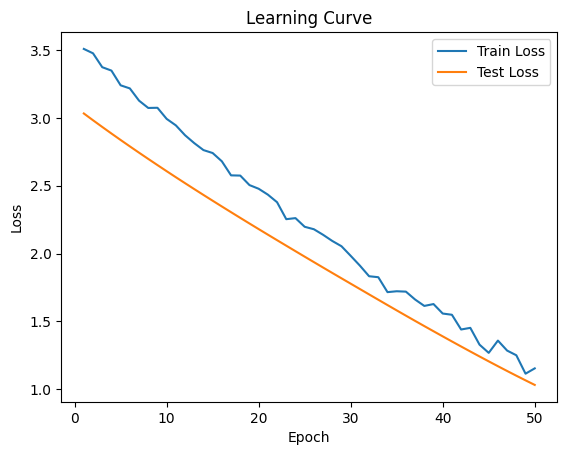

In [119]:
# 9. Plot Learning Curve
plt.plot(range(1, n_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, n_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [120]:
# 10. Test Some Actual Predictions
sample_users = test_users[:5]
sample_items = test_items[:5]

model.eval()
with torch.no_grad():
    sample_preds = model(sample_users.to(device), sample_items.to(device))

print("\nSample Predictions:")
for u, i, p in zip(sample_users, sample_items, sample_preds):
    print(f"User {u.item()} - Item {i.item()} => Predicted Rating: {p.item():.2f}")


Sample Predictions:
User 42 - Item 51 => Predicted Rating: 3.08
User 934 - Item 1091 => Predicted Rating: 3.15
User 1146 - Item 1303 => Predicted Rating: 3.66
User 347 - Item 510 => Predicted Rating: 3.34
User 908 - Item 1065 => Predicted Rating: 3.20
